<a href="https://colab.research.google.com/github/AkanshaJajodia/DefaultCreditCardClassification/blob/master/DefaultCreditCardClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Importing Libraries')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
print('Libraries Imported')

Importing Libraries
Libraries Imported


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/AkanshaJajodia/DefaultCreditCardClassification/master/UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [7]:
print('The Dataset Contains',df.shape[0],'rows and', df.shape[1],'columns')

The Dataset Contains 30000 rows and 25 columns


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There is no missing values in the dataset.


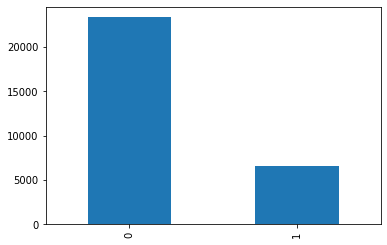

In [12]:
#plotting the target column
df['default.payment.next.month'].value_counts().plot.bar()

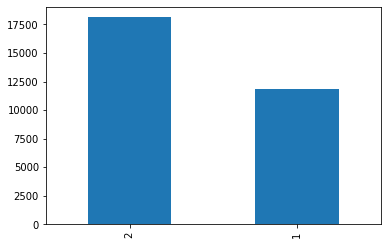

In [14]:
# checking the no of males and females
df['SEX'].value_counts().plot.bar()

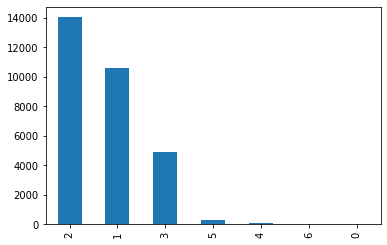

In [16]:
# plotting eductation level
df['EDUCATION'].value_counts().plot.bar()

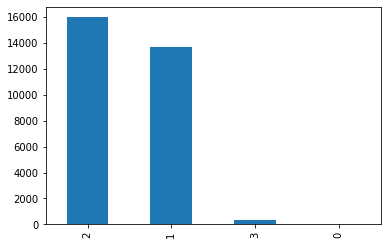

In [17]:
#Visualizing relationship status
df['MARRIAGE'].value_counts().plot.bar()


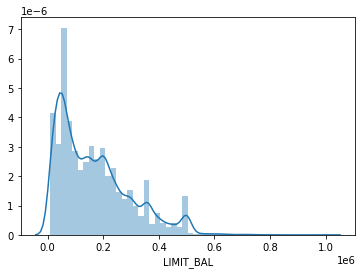

In [21]:
#Using Seaborn to visualize the distribution of the Limit_Bal feature
sns.distplot(df['LIMIT_BAL'],kde=True);


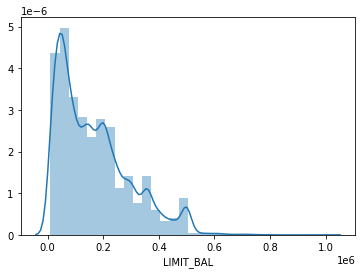

In [22]:
#Using Seaborn to visualize the distribution of the Limit_Bal feature using bins

sns.distplot(df['LIMIT_BAL'],kde=True,bins=30);

Text(0.5, 0, 'LIMIT_BAL')

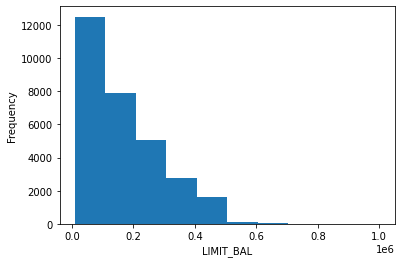

In [44]:
df.LIMIT_BAL.plot.hist();
plt.xlabel('LIMIT_BAL')

From the above graph it can be seen that most of the values are between 0 and 0.2

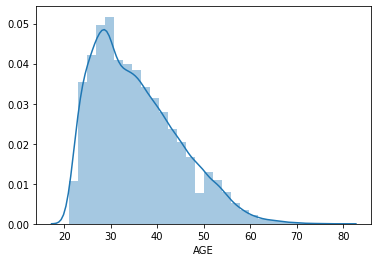

In [23]:
#Visualizing distribution of age
sns.distplot(df['AGE'],kde=True,bins=30)


Text(0.5, 0, 'Age')

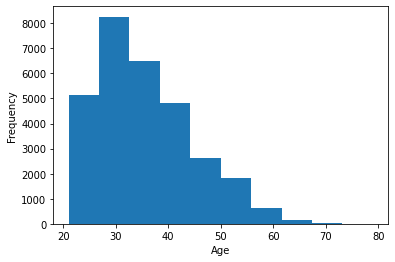

In [43]:
df.AGE.plot.hist();
plt.xlabel('Age')

In [24]:
pd.crosstab(df.SEX,df.LIMIT_BAL)

LIMIT_BAL,10000.0,16000.0,20000.0,30000.0,40000.0,50000.0,60000.0,70000.0,80000.0,90000.0,100000.0,110000.0,120000.0,130000.0,140000.0,150000.0,160000.0,170000.0,180000.0,190000.0,200000.0,210000.0,220000.0,230000.0,240000.0,250000.0,260000.0,270000.0,280000.0,290000.0,300000.0,310000.0,320000.0,327680.0,330000.0,340000.0,350000.0,360000.0,370000.0,380000.0,...,400000.0,410000.0,420000.0,430000.0,440000.0,450000.0,460000.0,470000.0,480000.0,490000.0,500000.0,510000.0,520000.0,530000.0,540000.0,550000.0,560000.0,570000.0,580000.0,590000.0,600000.0,610000.0,620000.0,630000.0,640000.0,650000.0,660000.0,670000.0,680000.0,690000.0,700000.0,710000.0,720000.0,730000.0,740000.0,750000.0,760000.0,780000.0,800000.0,1000000.0
SEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,306,1,1110,593,87,1628,289,252,524,190,377,220,239,282,269,379,249,195,325,97,581,230,186,218,233,130,185,82,193,123,187,93,131,1,67,66,96,384,31,81,...,100,40,70,29,27,70,41,43,36,38,330,5,9,5,1,10,6,3,6,3,6,4,4,3,2,1,2,2,2,0,4,3,1,2,1,0,1,1,2,0
2,187,1,866,1017,143,1737,536,479,1043,461,671,368,487,447,480,731,445,337,670,132,947,500,283,519,386,220,336,156,300,225,367,179,181,0,106,151,135,497,40,75,...,171,38,98,54,56,91,39,37,43,26,392,14,11,5,5,11,4,5,5,3,10,7,5,4,5,2,1,1,2,1,4,3,2,0,1,4,0,1,0,1


In [25]:
pd.crosstab(df.LIMIT_BAL,df.SEX)

SEX,1,2
LIMIT_BAL,,
10000.0,306,187
16000.0,1,1
20000.0,1110,866
30000.0,593,1017
40000.0,87,143
...,...,...
750000.0,0,4
760000.0,1,0
780000.0,1,1


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

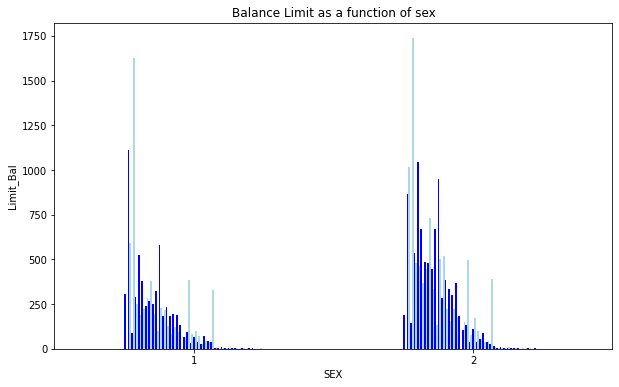

In [36]:
pd.crosstab(df.SEX,df.LIMIT_BAL).plot.bar(figsize=(10, 6), color=['blue','lightblue'],legend=False);
plt.title('Balance Limit as a function of sex');
plt.xlabel('SEX')
plt.ylabel('Limit_Bal');
plt.xticks(rotation=0)


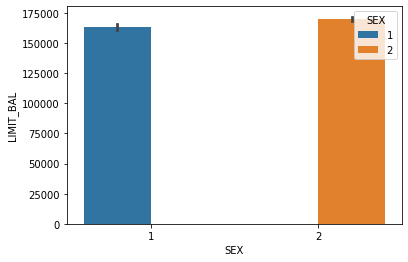

In [42]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=df,hue='SEX')

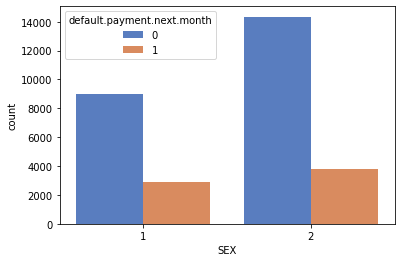

In [47]:
#visualizing 
sns.countplot(x='SEX', data=df,hue="default.payment.next.month", palette="muted")


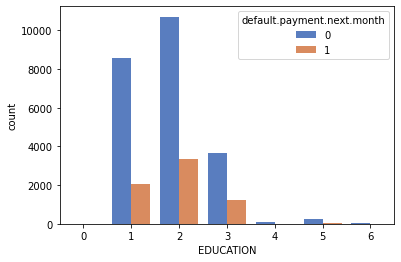

In [48]:
sns.countplot(x='EDUCATION', data=df,hue="default.payment.next.month", palette="muted")


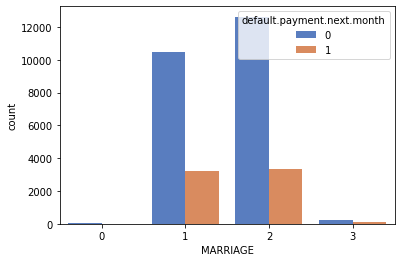

In [49]:
sns.countplot(x='MARRIAGE', data=df,hue="default.payment.next.month", palette="muted")


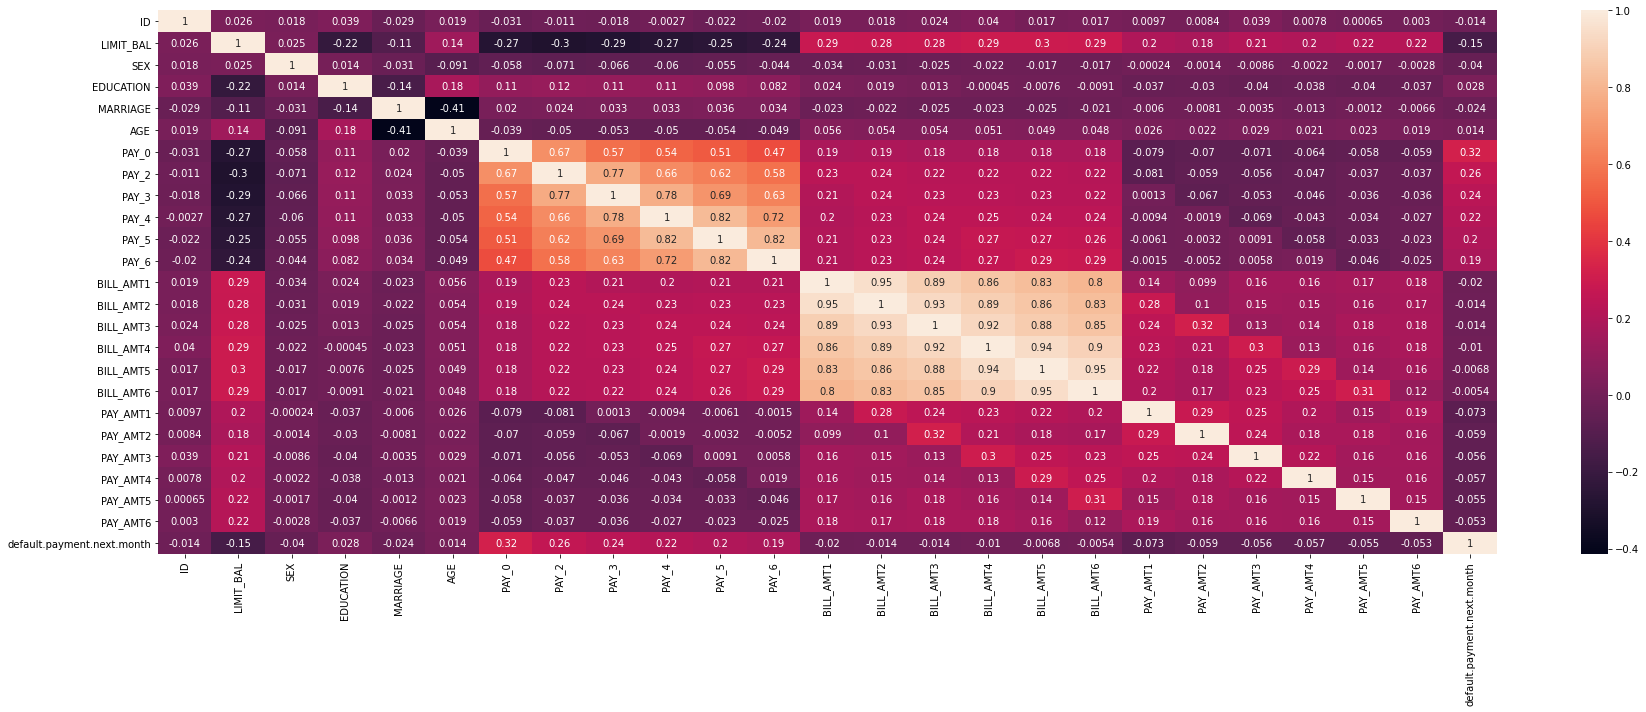

In [51]:
#visualizing correlation matrix
correlation = df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(correlation,  annot=True)

In [52]:

print('Value Counts with Pay_0',df['PAY_0'].value_counts())
print('Value Counts with Pay_2',df['PAY_2'].value_counts())
print( 'Value Counts with Pay_3',df['PAY_3'].value_counts())
print('Value Counts with Pay_4',df['PAY_4'].value_counts())
print('Value Counts with Pay_5',df['PAY_5'].value_counts())
print('Value Counts with Pay_6',df['PAY_6'].value_counts())

Value Counts with Pay_0  0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
Value Counts with Pay_2  0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
Value Counts with Pay_3  0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
Value Counts with Pay_4  0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
Value Counts with Pay_5  0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
Value Counts with Pay_6  0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7    

In [53]:
fil = (df.PAY_0 == 4) | (df.PAY_0==5) | (df.PAY_0==6) | (df.PAY_0==7) | (df.PAY_0==8)
df.loc[fil,'PAY_0']=4
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4      141
Name: PAY_0, dtype: int64

In [54]:
fil = (df.PAY_2 == 4) | (df.PAY_2 == 1) | (df.PAY_2 == 5) | (df.PAY_2 == 7) | (df.PAY_2 == 6) | (df.PAY_2 == 8) 
df.loc[fil,'PAY_2']=4
#df.PAY_2.value_counts()
fil = (df.PAY_3 == 4) | (df.PAY_3 == 1) | (df.PAY_3 == 5) | (df.PAY_3 == 7) | (df.PAY_3 == 6) | (df.PAY_3 == 8) 
df.loc[fil,'PAY_3']=4
#df.PAY_3.value_counts()
fil = (df.PAY_4 == 4) | (df.PAY_4 == 1) | (df.PAY_4 == 5) | (df.PAY_4 == 7) | (df.PAY_4 == 6) | (df.PAY_4 == 8) 
df.loc[fil,'PAY_4']=4
#df.PAY_4.value_counts()
fil = (df.PAY_5 == 4) | (df.PAY_5 == 7) | (df.PAY_5 == 5) | (df.PAY_5 == 6) | (df.PAY_5 == 8) 
df.loc[fil,'PAY_5']=4
#df.PAY_5.value_counts()
fil = (df.PAY_6 == 4) | (df.PAY_6 == 7) | (df.PAY_6 == 5) | (df.PAY_6 == 6) | (df.PAY_6 == 8) 
df.loc[fil,'PAY_6']=4

In [55]:
#normalizing the columns
df.columns = df.columns.map(str.lower)
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
df[col_to_norm] = df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [56]:
#preparing the model

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

In [58]:
print("Shape of Training Features :", X_train.shape)
print("Shape of Testing Features :", X_test.shape)
print("Shape of Training Target :", y_train.shape)
print("Shape of Test Target :", y_test.shape)

Shape of Training Features : (22500, 24)
Shape of Testing Features : (7500, 24)
Shape of Training Target : (22500,)
Shape of Test Target : (7500,)


In [59]:
# using Logistic Regression

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred = logmodel.predict(X_test)


In [61]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [63]:

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['LogisticRegression', acc,prec,rec, f1, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(results)


                Model  Accuracy  Precision    Recall  F1 Score       ROC
0  LogisticRegression  0.805467   0.689655  0.227818  0.342497  0.599248


In [65]:
# using SGD

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [76]:
y_pred = sgd.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['SGD', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SGD,0.779067,0.539007,0.045564,0.084024,0.517209


In [68]:
# using KNN
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# 39 neighbors
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

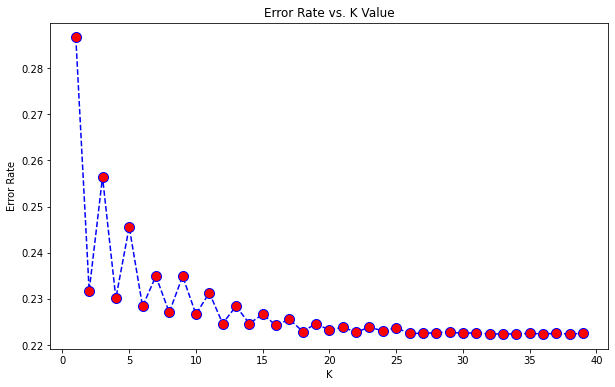

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [70]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


Minimum error:- 0.2224 at K = 31


In [75]:
y_pred = knn.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['KNN', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.777467,0.0,0.0,0.0,0.499914


In [73]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
y_pred =xgb.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.8196,0.682927,0.352518,0.465006,0.652854
